# <h1><center> ` Evaluation Data Approfondissement` </center></h1>    




  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb


In [2]:
data = pd.read_csv ("train.csv")
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9305-CDSKC  Female              0      No         No       8          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4               Yes     Fiber optic             No  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No         Yes             Yes  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          99.65         820.5   Yes  

[5 rows x 21 columns]

# <h1><center> `I. Data management` </center></h1>    






- #  <span style='color:grey'> 1. Faites une brève description de la base de données (nombre de lignes, de colonnes, % de churn) </span> 



In [3]:
data.shape

(6338, 21)

In [4]:
pd.DataFrame({ "Yes" : str(round ((len(data[data["Churn"]=="Yes"].Churn)/data.shape[0])*100, ))+ "%",
              
                    "No" : str(round ((len(data[data["Churn"]=="No"].Churn)/data.shape[0])*100, )) + "%"},
             
                       index = ["Pourcentage de Churn"])


Yes   No
Pourcentage de Churn  26%  74%

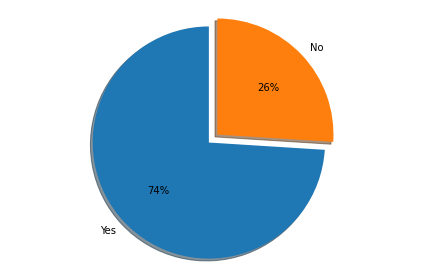

In [5]:
labels = ['Yes', 'No']
sizes = [74, 26]
fig1, ax1 = plt.subplots()
explode = (0, 0.1)
ax1.pie(sizes, explode = explode, labels=labels, autopct='%1.f%%', startangle=90, shadow = True)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Y'a beaucoup plus d'abonnés (74%) que de désabonnés (26%)

- #  <span style='color:grey'> 2. Détectez et traitez les valeurs manquantes ou aberrantes (s’il y en a) </span>

In [6]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- #  <span style='color:grey'> 3. Enrichissez la base de données en créant des variables pertinentes au regard du churn </span>

In [7]:
def clean_tc(x):
    try:
        return float(x)
    except:
        return np.nan
    
data["TotalCharges"] = data["TotalCharges"].apply(clean_tc)
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9305-CDSKC  Female              0      No         No       8   
...          ...     ...            ...     ...        ...     ...   
6333  6840-RESVB    Male              0     Yes        Yes      24   
6334  2234-XADUH  Female              0     Yes        Yes      72   
6335  4801-JZAZL  Female              0     Yes        Yes      11   
6336  8361-LTMKD    Male              1     Yes         No       4   
6337  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes               Yes     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
6333          Yes               Yes             DSL            Yes  ...   
6334          Yes               Yes     Fiber optic             No  ...   
6335           No  No phone service             DSL            Yes  ...   
6336          Yes               Yes     Fiber optic             No  ...   
6337          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                 Yes          No         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
6333              Yes         Yes         Yes             Yes        One year   
6334              Yes          No         Yes             Yes        One year   
6335               No          No          No              No  Month-to-month   
6336               No          No          No              No  Month-to-month   
6337              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          99.65        820.50   
...               ...                        ...            ...           ...   
6333              Yes               Mailed check          84.80       1990.50   
6334              Yes    Credit card (automatic)         103.20       7362.90   
6335              Yes           Electronic check          29.60        346.45   
6336              Yes               Mailed check          74.40        306.60   
6337              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
6333     No  
6334     No  
6335     No  
6336    Yes  
6337     No  

[6338 rows x 21 columns]

In [8]:
data["Charges_moyennes"] = round(data["TotalCharges"]/data["tenure"], 1)
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
Charges_moyennes    float64
dtype: object

# <h1><center> `II. Exploration des données` </center></h1> 

- #  <span style='color:grey'> 1. Proposez des graphiques (ou tableaux) pour regarder la corrélation/liaison     entre le taux de churn (attrition) et les variables explicatives (démographiques et celles liées aux abonnements téléphoniques et internet) </span>

- #  <span style='color:grey'> 2. Interprétez les résultats de ces analyses descriptives </span>

<Figure size 864x576 with 0 Axes>

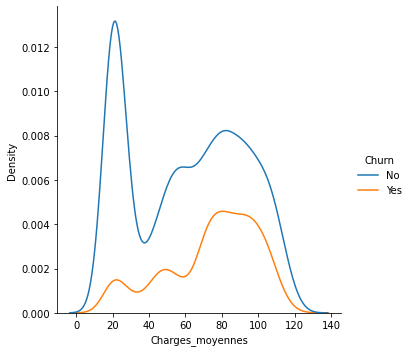

In [9]:
plt.figure(figsize=(12, 8))
sns.displot(data, x="Charges_moyennes", hue = "Churn", kind="kde")

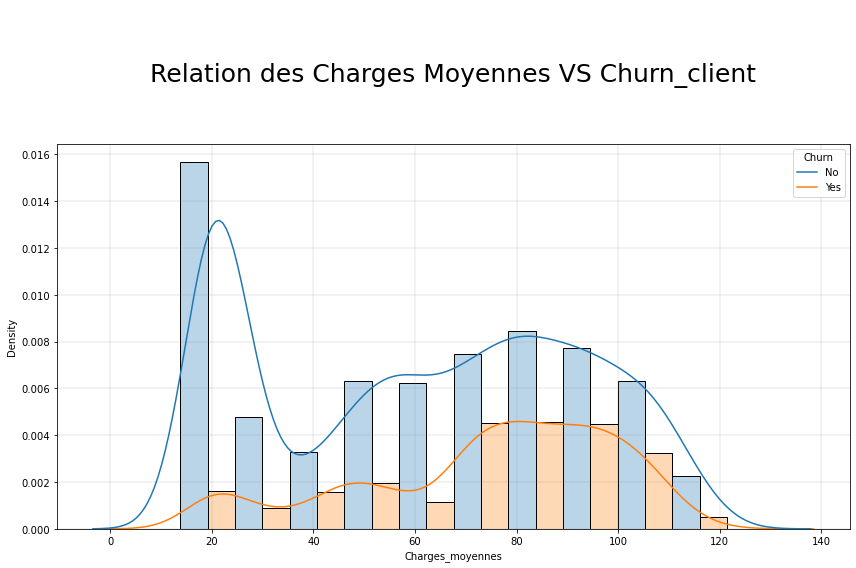

In [10]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="Charges_moyennes", hue="Churn", multiple="dodge", bins=10, stat="density", alpha = 0.3)
sns.kdeplot(data=data, x="Charges_moyennes", hue="Churn")
plt.title("\n\nRelation des Charges Moyennes VS Churn_client\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)
gridsize = (6, 4)
plt.tight_layout()

Avec une valeur une charges_moyennes comprise entre 0 et un peu moins de 40 $ les clients seraient plutôt « fidèles » à la société (blue curve).    

Avec une valeur de charges_moyennes comprise aux environs de 60 et à peu près 135$ les clients seraient plus ou moins réticents à la société.


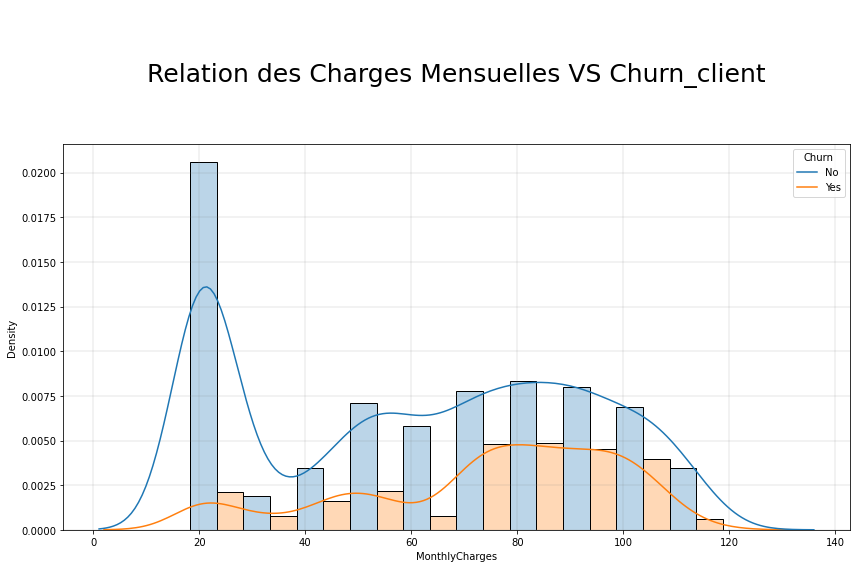

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="MonthlyCharges", hue="Churn", multiple="dodge", bins=10, stat="density", alpha = 0.3)
sns.kdeplot(data=data, x="MonthlyCharges", hue="Churn")
plt.title("\n\nRelation des Charges Mensuelles VS Churn_client\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)
gridsize = (6, 4)
plt.tight_layout()

Avec une valeur une charges_mensuelles comprise entre 0 et un peu moins de 40 $ les clients seraient plutôt « fidèles » à la société (courbe bleue).    

Avec une valeur de charges_mensuelles comprise aux environs de 60 et à peu près 135$ les clients seraient plus ou moins réticents à la société.

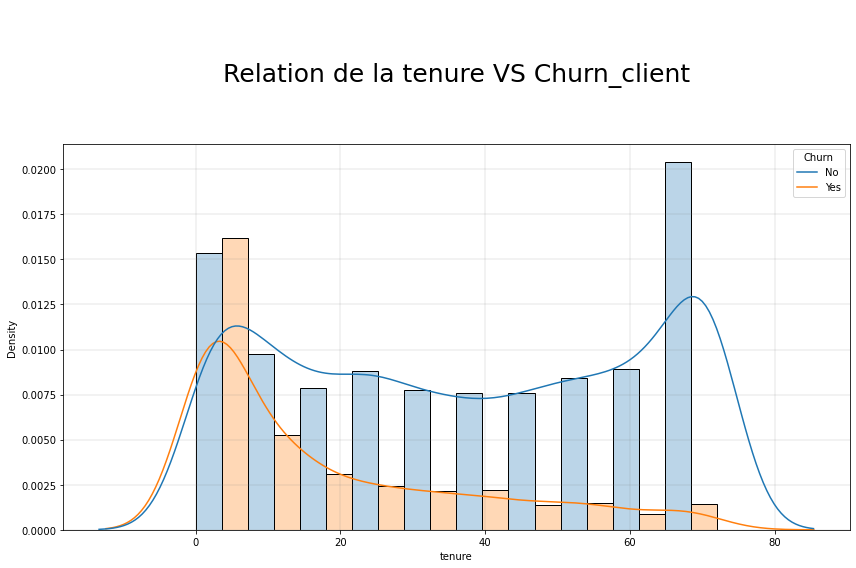

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=data, x="tenure", hue="Churn", multiple="dodge", bins=10, stat="density", alpha = 0.3)
sns.kdeplot(data=data, x="tenure", hue="Churn")
plt.title("\n\nRelation de la tenure VS Churn_client\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)
gridsize = (6, 4)
plt.tight_layout()

On remarque qu'au delà d'une période comprise entre 15 et 20 les clients sont beaucoup plus fidèles ou ont une légère tendance à rester (blue curve).

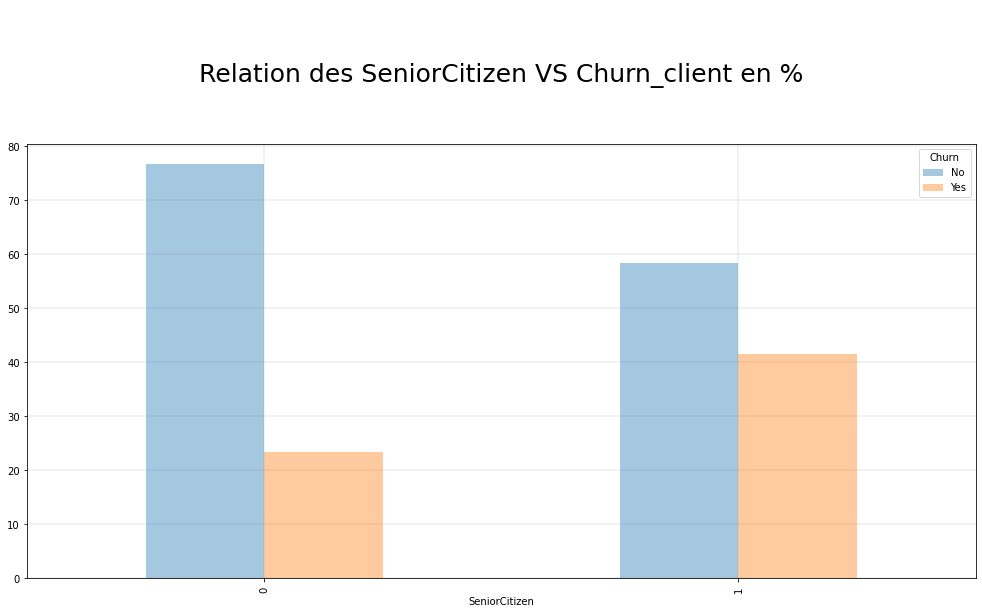

In [13]:
df = round(data.groupby(["SeniorCitizen"]).Churn.value_counts(normalize=True)*100, 2).unstack()
df.plot.bar(figsize=(17, 8), alpha = 0.4)
plt.title("\n\nRelation des SeniorCitizen VS Churn_client en %\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)


Plus on est jeune et plus on est fidèle à la société.

gender  Churn
Female  No       73.52
        Yes      26.48
Male    No       73.91
        Yes      26.09
Name: Churn, dtype: float64


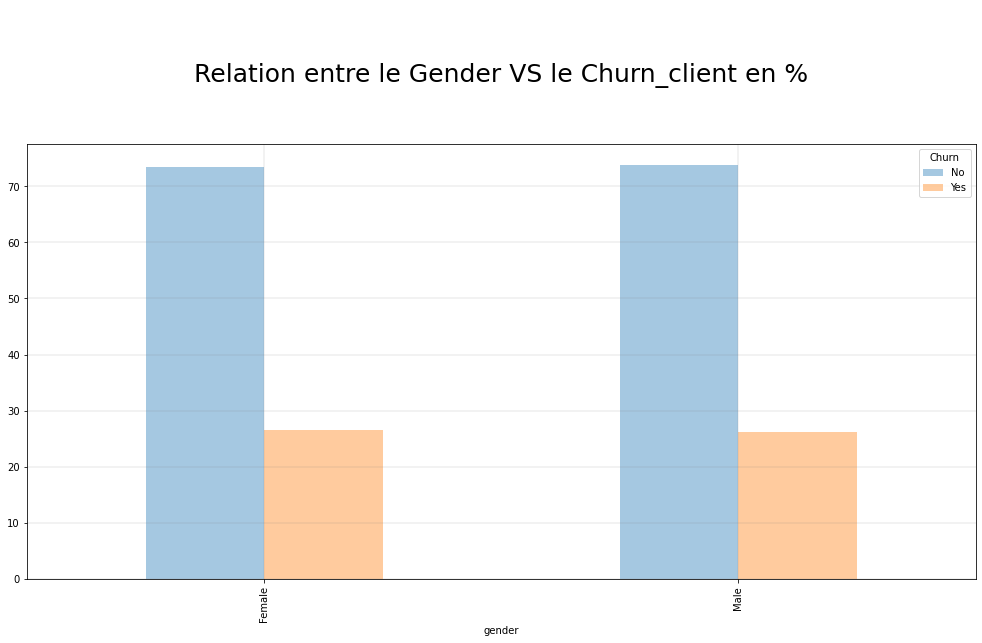

In [14]:
print(round(data.groupby(["gender"]).Churn.value_counts(normalize=True)*100, 2))
df_ = round(data.groupby(["gender"]).Churn.value_counts(normalize=True)*100, 2).unstack()
df_.plot.bar(figsize=(17, 8), alpha = 0.4)
plt.title("\n\nRelation entre le Gender VS le Churn_client en %\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)

c'est presque pareil ici, donc que ça soit un homme ou une femme le sexe ne définit pas le fidélité.

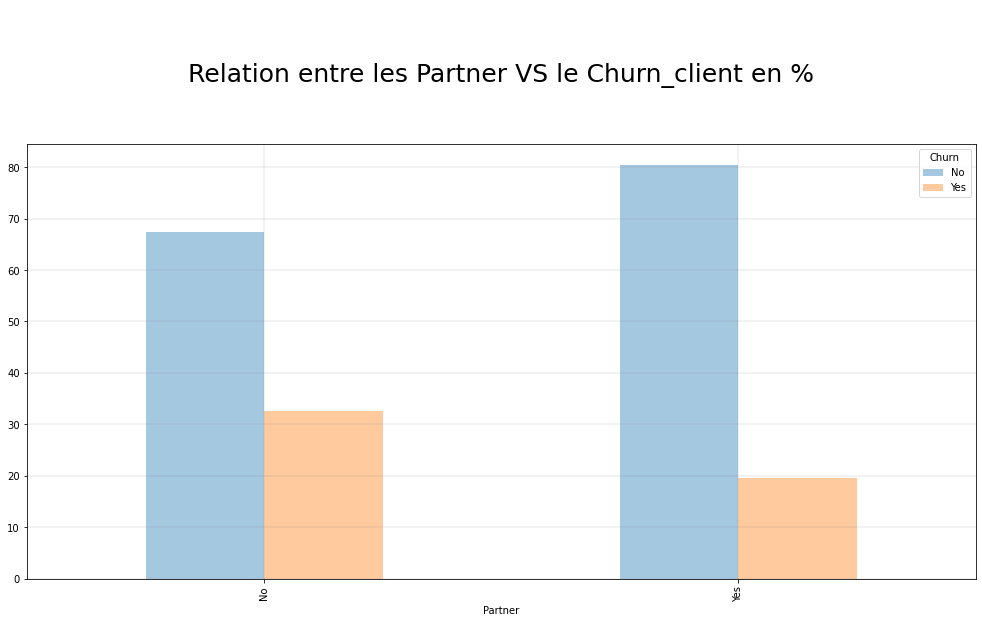

In [15]:
df1 = round(data.groupby(["Partner"]).Churn.value_counts(normalize=True)*100, 2).unstack()
df1.plot.bar(figsize=(17, 8), alpha = 0.4)
plt.title("\n\nRelation entre les Partner VS le Churn_client en %\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)

C'est tout à fait normal que l'on soit beaucoup plus fidèle si on a un partenaire par rapport à quelqu'un qui ne l'aurait pas (rationnalité).

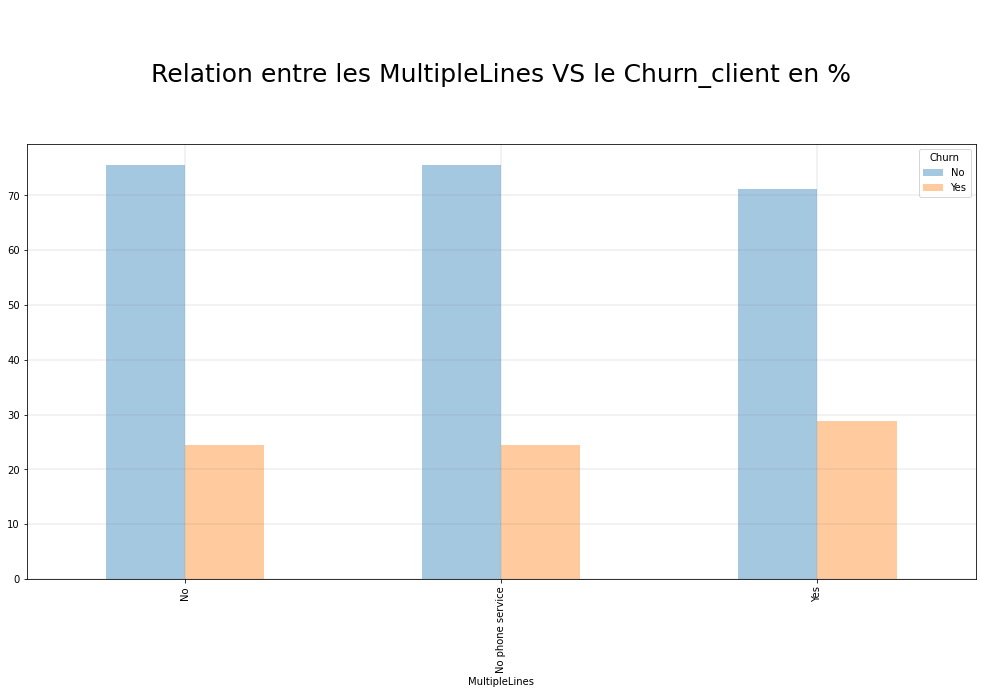

In [16]:
df2 = round(data.groupby(["MultipleLines"]).Churn.value_counts(normalize=True)*100, 2).unstack()
df2.plot.bar(figsize=(17, 8), alpha = 0.4)
plt.title("\n\nRelation entre les MultipleLines VS le Churn_client en %\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)

Le fait d'avoir plusieurs abonnements ou non sein de la même société ne définit pas la fidélité du client.

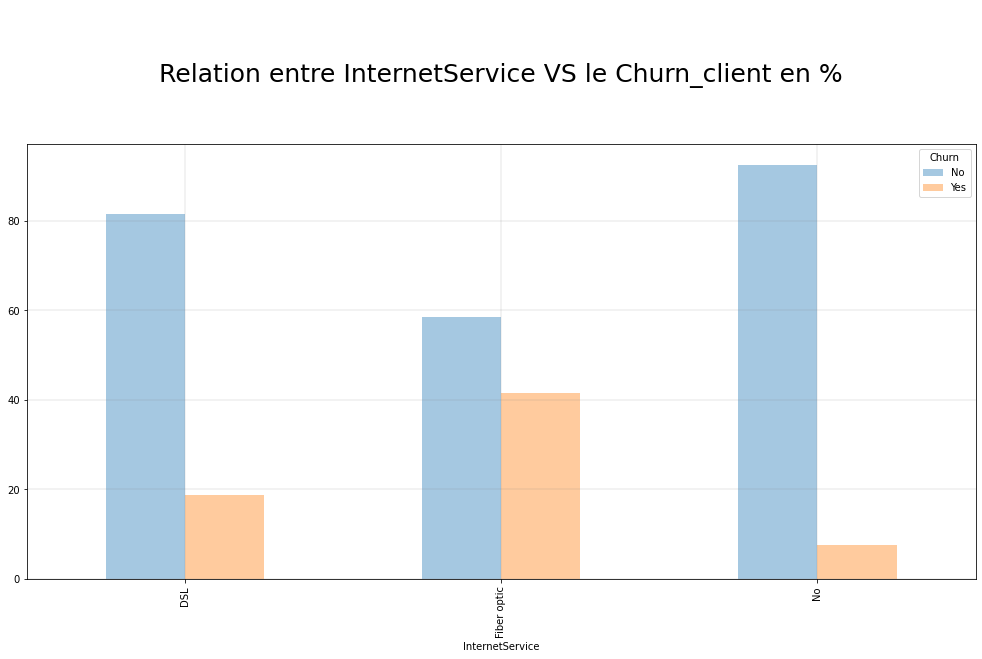

In [17]:
df3 = round(data.groupby(["InternetService"]).Churn.value_counts(normalize=True)*100, 2).unstack()
df3.plot.bar(figsize=(17, 8), alpha = 0.4)
plt.title("\n\nRelation entre InternetService VS le Churn_client en %\n\n", fontsize = 25)
plt.grid(which='major', axis='both', color='grey', linewidth=0.2)

Les clients qui disposent de la fibre optique sont plus infidèles que les autres.

# <h1><center> `III. Modélisation` </center></h1> 

- #  <span style='color:grey'> 1. Construction de la base de modélisation (conversion de variables catégorielles en numérique, découpage de variables, transformation de variables, ….)  </span> 



* Suppression des var CostumersId et les charges mensuelles et totales

In [18]:
data = data.drop (columns = ["customerID", "TotalCharges", "MonthlyCharges"])

* Encodage des var quali

In [19]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
Charges_moyennes    11
dtype: int64

In [20]:
data['Charges_moyennes'] = data['Charges_moyennes'].fillna(data['Charges_moyennes'].median())
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
Charges_moyennes    0
dtype: int64

In [21]:
data["gender"] = np.where (data["gender"] == "Male", 1, 0 )
data["Partner"] = np.where (data["Partner"] == "Yes", 1, 0 )
data["Dependents"] = np.where (data["Dependents"] == "Yes", 1, 0 )
data["PhoneService"] = np.where (data["PhoneService"] == "Yes", 1, 0 )
data["MultipleLines"] = np.where (data["MultipleLines"] == "Yes", 1, 0 )
data["OnlineSecurity"] = np.where (data["OnlineSecurity"] == "Yes", 1, 0 )
data["OnlineBackup"] = np.where (data["OnlineBackup"] == "Yes", 1, 0 )
data["DeviceProtection"] = np.where (data["DeviceProtection"] == "Yes", 1, 0 )
data["TechSupport"] = np.where (data["TechSupport"] == "Yes", 1, 0 )
data["StreamingTV"] = np.where (data["StreamingTV"] == "Yes", 1, 0 )
data["StreamingMovies"] = np.where (data["StreamingMovies"] == "Yes", 1, 0 )
data["PaperlessBilling"] = np.where (data["PaperlessBilling"] == "Yes", 1, 0 )
data["Churn"] = np.where (data["Churn"] == "Yes", 1, 0 )

data["PaymentMethod"] = pd.get_dummies(data["PaymentMethod"])
data["PaymentMethod"] = data["PaymentMethod"].astype(int)
data["Contract"] = pd.get_dummies(data["Contract"])
data["Contract"] = data["Contract"].astype(int)
data["InternetService"] = pd.get_dummies(data["InternetService"])
data["InternetService"] = data["InternetService"].astype(int)
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
Churn                 int64
Charges_moyennes    float64
dtype: object

In [22]:
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       8             1   
...      ...            ...      ...         ...     ...           ...   
6333       1              0        1           1      24             1   
6334       0              0        1           1      72             1   
6335       0              0        1           1      11             0   
6336       1              1        1           0       4             1   
6337       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 0                1               0             1   
1                 0                1               1             0   
2                 0                1               1             1   
3                 0                1               1             0   
4                 1                0               0             0   
...             ...              ...             ...           ...   
6333              1                1               1             0   
6334              1                0               0             1   
6335              0                1               1             0   
6336              1                0               0             0   
6337              0                0               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         1   
1                    1            0            0                0         0   
2                    0            0            0                0         1   
3                    1            1            0                0         0   
4                    1            0            1                1         1   
...                ...          ...          ...              ...       ...   
6333                 1            1            1                1         0   
6334                 1            0            1                1         0   
6335                 0            0            0                0         1   
6336                 0            0            0                0         1   
6337                 1            1            1                1         0   

      PaperlessBilling  PaymentMethod  Churn  Charges_moyennes  
0                    1              0      0              29.8  
1                    0              0      0              55.6  
2                    1              0      1              54.1  
3                    0              1      0              40.9  
4                    1              0      1             102.6  
...                ...            ...    ...               ...  
6333                 1              0      0              82.9  
6334                 1              0      0             102.3  
6335                 1              0      0              31.5  
6336                 1              0      1              76.6  
6337                 1              1      0             103.7  

[6338 rows x 19 columns]

- #  <span style='color:grey'> 2. Scindez la base de modélisation en échantillon d’apprentissage (70%) et de test (30%) </span>

In [23]:
X = data.drop (columns = ["Churn", "Charges_moyennes"])
Y = data["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.3, random_state = 1234) 

- #  <span style='color:grey'> 3. Implémentez les modèles de machine learning suivants et optimisez-les avec une des méthodes d’optimisation vu en cours.    
    
a. Random forest    
b. XGBoost    
c. ANN (en optimisant le pas de descente de gradient) </span>

##  3.1 Random Forest

In [24]:
RFC = RandomForestClassifier()

n_estimators = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_features = [1, 3, 7, 11, 15, 17, 20]
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
criterion = ['gini', 'entropy']

param_grid = {'n_estimators' : n_estimators,
              "max_features": max_features,
              "min_samples_leaf" : min_samples_leaf,
              'criterion': criterion
              
              }

grid = GridSearchCV(RFC, param_grid, cv=5, n_jobs = -1)

grid = grid.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f"
     % (grid.best_params_, grid.best_score_))

The best parameters are {'criterion': 'entropy', 'max_features': 7, 'min_samples_leaf': 9, 'n_estimators': 200} with a score of 0.79


In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


predi = cross_val_predict(grid.best_estimator_, X_train, Y_train, cv = 5)
print("*** confusion matrix ***")
print(confusion_matrix(Y_train, predi))
print("*** classification report ***")
print(classification_report(Y_train, predi))

*** confusion matrix ***
[[2971  278]
 [ 634  553]]
*** classification report ***
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      3249
           1       0.67      0.47      0.55      1187

    accuracy                           0.79      4436
   macro avg       0.74      0.69      0.71      4436
weighted avg       0.78      0.79      0.78      4436



In [26]:
classe = RandomForestClassifier (n_estimators = 200, max_features=7, min_samples_leaf=9, criterion = "entropy")
classe.fit (X_train, Y_train)
result = classe.score(X_train, Y_train)
result_1 = classe.score(X_test, Y_test)
print ("la performance sur le train est de", result)
print("la performance sur le test est de", result_1)

la performance sur le train est de 0.8298016230838593
la performance sur le test est de 0.7944269190325972


## 3.2 XGBoost

In [27]:
xgb_classifier = xgb.XGBClassifier()

learning_rate = (0.05, 0.1, 0.15, 0.2)
n_estimators = [100, 200, 300, 400, 500]
max_depth = [1, 3, 5, 6, 7, 8]
gamma = [ 0.0, 0.1, 0.2]
eval_metric = ["rmse", "mae", "mape", "logloss", "auc"]

param_grid1 = {'n_estimators' : n_estimators,
              'learning_rate' : learning_rate,
              "max_depth": max_depth,
              "gamma" : gamma,
              "eval_metric" : eval_metric
              
              }

grid1 = GridSearchCV(xgb_classifier, param_grid1, cv=5, n_jobs = -1)

grid1 = grid1.fit(X_train, Y_train)

print("The best parameters are %s with a score of %0.2f"
     % (grid1.best_params_, grid1.best_score_))

/Users/manu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


The best parameters are {'eval_metric': 'rmse', 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100} with a score of 0.79


In [28]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


pred1 = cross_val_predict(grid1.best_estimator_, X_train, Y_train, cv = 5)
print("*** confusion matrix ***")
print(confusion_matrix(Y_train, pred1))
print("*** classification report ***")
print(classification_report(Y_train, pred1))

/Users/manu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/manu/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


*** confusion matrix ***
[[2943  306]
 [ 609  578]]
*** classification report ***
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      3249
           1       0.65      0.49      0.56      1187

    accuracy                           0.79      4436
   macro avg       0.74      0.70      0.71      4436
weighted avg       0.78      0.79      0.78      4436



In [29]:
classe_1 = xgb.XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.05,
                             gamma = 0.0,
                            eval_metric = "rmse")
classe_1.fit (X_train, Y_train)
result_ = classe_1.score(X_train, Y_train)
result_2 = classe_1.score(X_test, Y_test)
print ("la performance sur le train est de", result_)
print("la performance sur le test est de", result_2)

la performance sur le train est de 0.834761045987376
la performance sur le test est de 0.7928496319663512


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

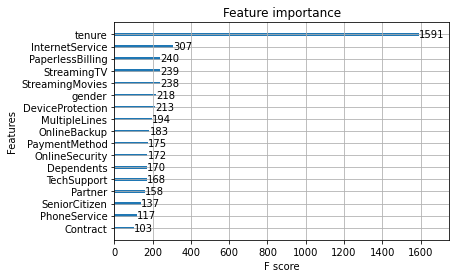

In [30]:
xgb.plot_importance(classe_1)

## 3.3 ANN

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = Sequential()
# ajouter la première couche
classifier.add(Dense(21, activation = 'relu'))
# ajouter la seconde couche
classifier.add(Dense(17, activation = 'relu'))
# ajouter la couche de sortie
classifier.add(Dense(1, activation = 'sigmoid'))

# complilation
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Entrainement
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)



Epoch 1/100
444/444 [==============================] - 1s 1ms/step - loss: 0.7239 - accuracy: 0.5699
Epoch 2/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4377 - accuracy: 0.7993
Epoch 3/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4335 - accuracy: 0.7987
Epoch 4/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4364 - accuracy: 0.7887
Epoch 5/100
444/444 [==============================] - 1s 3ms/step - loss: 0.4305 - accuracy: 0.7997
Epoch 6/100
444/444 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8040
Epoch 7/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4118 - accuracy: 0.8069
Epoch 8/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8022
Epoch 9/100
444/444 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.8036
Epoch 10/100
444/444 [==============================] - 1s 1ms/step - loss: 0.4048 - accura

444/444 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8320
Epoch 80/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3496 - accuracy: 0.8392
Epoch 81/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3438 - accuracy: 0.8405
Epoch 82/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8512
Epoch 83/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3463 - accuracy: 0.8410
Epoch 84/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3556 - accuracy: 0.8312
Epoch 85/100
444/444 [==============================] - 1s 1ms/step - loss: 0.3425 - accuracy: 0.8457
Epoch 86/100
444/444 [==============================] - 1s 3ms/step - loss: 0.3527 - accuracy: 0.8367: 1s - loss:
Epoch 87/100
444/444 [==============================] - 1s 3ms/step - loss: 0.3526 - accuracy: 0.8346
Epoch 88/100
444/444 [==============================] - 1s 3ms/step - loss: 0.3506 

- #  <span style='color:grey'> 4. Évaluez la performance des différents modèles sur le jeu de données test </span>

In [32]:
accuracy = classifier.evaluate (X_test, Y_test)
pd.DataFrame ({
    "Random_F" : 0.79442,
    "XGBoost" : 0.79284,
    "ANN" : accuracy[1]
}, index = ["score"])

60/60 [==============================] - 0s 1ms/step - loss: 0.5126 - accuracy: 0.7760


Random_F  XGBoost       ANN
score   0.79442  0.79284  0.776025

In [37]:
y_pred_RF = classe.predict (X_test)
print(confusion_matrix (Y_test, y_pred_RF))

print(classification_report(Y_test, y_pred_RF))

[[977 446]
 [108 371]]
              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1423
           1       0.45      0.77      0.57       479

    accuracy                           0.71      1902
   macro avg       0.68      0.73      0.68      1902
weighted avg       0.79      0.71      0.73      1902



In [38]:
y_pred_XGB = classe_1.predict (X_test)
print(confusion_matrix (Y_test, y_pred_XGB))

print(classification_report(Y_test, y_pred_XGB))

[[946 477]
 [100 379]]
              precision    recall  f1-score   support

           0       0.90      0.66      0.77      1423
           1       0.44      0.79      0.57       479

    accuracy                           0.70      1902
   macro avg       0.67      0.73      0.67      1902
weighted avg       0.79      0.70      0.72      1902



/Users/manu/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


- #  <span style='color:grey'> 5. Comparez les modèles et choisissez-en le meilleur au regard de la performance sur la base test </span>

le modèle obtenu avec le XGBoost l'emporte sur les deux autres modèles

- #  <span style='color:grey'> 6. Effectuez une prédiction de la probabilité de churn (d’attrition) d’un client sur le jeu de données Evaluation fourni avec votre meilleur modèle </span>

In [40]:
df = pd.read_csv ("evaluation.csv")
df.shape

(705, 20)

In [41]:
df = df.drop (columns = ["customerID", "TotalCharges", "MonthlyCharges"])
df["gender"] = np.where (df["gender"] == "Male", 1, 0 )
df["Partner"] = np.where (df["Partner"] == "Yes", 1, 0 )
df["Dependents"] = np.where (df["Dependents"] == "Yes", 1, 0 )
df["PhoneService"] = np.where (df["PhoneService"] == "Yes", 1, 0 )
df["MultipleLines"] = np.where (df["MultipleLines"] == "Yes", 1, 0 )
df["OnlineSecurity"] = np.where (df["OnlineSecurity"] == "Yes", 1, 0 )
df["OnlineBackup"] = np.where (df["OnlineBackup"] == "Yes", 1, 0 )
df["DeviceProtection"] = np.where (df["DeviceProtection"] == "Yes", 1, 0 )
df["TechSupport"] = np.where (df["TechSupport"] == "Yes", 1, 0 )
df["StreamingTV"] = np.where (df["StreamingTV"] == "Yes", 1, 0 )
df["StreamingMovies"] = np.where (df["StreamingMovies"] == "Yes", 1, 0 )
df["PaperlessBilling"] = np.where (df["PaperlessBilling"] == "Yes", 1, 0 )

df["PaymentMethod"] = pd.get_dummies(df["PaymentMethod"])
df["PaymentMethod"] = df["PaymentMethod"].astype(int)
df["Contract"] = pd.get_dummies(df["Contract"])
df["Contract"] = df["Contract"].astype(int)
df["InternetService"] = pd.get_dummies(df["InternetService"])
df["InternetService"] = df["InternetService"].astype(int)

In [42]:
xgb_classifier = xgb.XGBClassifier()
classe_1 = xgb.XGBClassifier(max_depth=6, n_estimators=100, learning_rate=0.05,
                             gamma = 0.0,
                            eval_metric = "rmse")
classe_1.fit (X_train, Y_train)
pred = classe_1.predict(df)
df["Churn"] = pred
df.to_csv ("Evaluation.csv", index = None, header=True)
df

/Users/manu/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0         0              0        0           1      13             0   
1         0              0        0           0      35             1   
2         0              0        1           1      18             1   
3         1              0        0           0      43             1   
4         0              0        0           0      51             1   
..      ...            ...      ...         ...     ...           ...   
700       1              0        1           1      34             1   
701       1              0        1           1      72             1   
702       1              0        1           1      51             1   
703       0              1        0           0       1             1   
704       1              0        0           0      53             1   

     MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                0                1               0             1   
1                1                0               0             0   
2                0                0               0             0   
3                1                0               0             0   
4                0                0               0             0   
..             ...              ...             ...           ...   
700              0                0               0             0   
701              1                0               0             0   
702              0                1               1             0   
703              0                0               0             0   
704              0                0               0             0   

     DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                   0            0            0                0         1   
1                   0            0            0                0         0   
2                   0            0            0                0         0   
3                   0            0            0                0         1   
4                   0            0            0                0         0   
..                ...          ...          ...              ...       ...   
700                 0            0            1                0         1   
701                 0            0            0                0         0   
702                 0            1            1                1         0   
703                 1            0            0                1         1   
704                 0            0            0                0         0   

     PaperlessBilling  PaymentMethod  Churn  
0                   0              0      0  
1                   0              1      0  
2                   0              0      0  
3                   1              0      0  
4                   0              1      0  
..                ...            ...    ...  
700                 0              0      0  
701                 0              0      0  
702                 1              1      0  
703                 1              0      0  
704                 0              1      0  

[705 rows x 18 columns]

In [43]:
pd.DataFrame({ "No" : str(round ((len([i for i in pred if i == 0])/len(pred))*100, ))+ "%",
              
                    "Yes" : str(round ((len([i for i in pred if i == 1])/len(pred))*100, )) + "%"},
             
                       index = ["Pourcentage de Churn"])

No Yes
Pourcentage de Churn  99%  1%

## Avec une base de données de 705 Clients, on aura un taux de désabonnement de 1%